In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from Features import *



In [2]:
df=pd.read_csv('ReadyData/EURUSD_2020_2023_15M_READY.csv',index_col=0,parse_dates=True)

# Features engineering 

In [19]:
df = rsi(df,'close', 10)
df = atr(df,5)
df['lag_100_diff'] = df['close'] - df['close'].shift(100)
df['lag_50_diff'] = df['close'] - df['close'].shift(50)
df['lag_10_diff'] = df['close'] - df['close'].shift(10)
df['lag_5_diff'] = df['close'] - df['close'].shift(5)

df['hour'] = df.index.hour

df['return'] = df['close'].pct_change(1)
df['signal'] = np.where(df['return'] > 0 ,1,-1)

df.dropna(inplace=True)

df = bollinger_band(df,'close',20,2)
htf = resample_dataframe(df,'1H')
htf = htf.shift()

htf = macd(htf, "close", 12, 26, 9)
df = df.merge(htf[['macd', 'signal_line']], left_index=True, right_index=True, how='left')
df[['macd', 'signal_line']] = df[['macd', 'signal_line']].ffill() 

df['diff_boll_h'] = df['close'] - df['BB_H']
df['diff_boll_l'] = df['close'] - df['BB_L']
df['diff_boll_m'] = df['close'] - df['BB_M']
df

,open,high,low,close,volume,low_time,high_time,RSI,ATR,lag_100_diff,...,return,signal,BB_M,BB_H,BB_L,macd,signal_line,diff_boll_h,diff_boll_l,diff_boll_m
time,,,,,,,,,,,,,,,,,,,,,
2020-01-06 02:15:00,1.11641,1.11682,1.11640,1.11672,226,2020-01-06 02:15:00,2020-01-06 02:25:00,69.964664,0.000486,-0.00058,...,0.000287,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06 02:30:00,1.11671,1.11684,1.11655,1.11676,228,2020-01-06 02:39:00,2020-01-06 02:36:00,64.730290,0.000466,-0.00033,...,0.000036,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06 02:45:00,1.11674,1.11680,1.11630,1.11636,294,2020-01-06 02:57:00,2020-01-06 02:48:00,55.714286,0.000494,-0.00073,...,-0.000358,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06 03:00:00,1.11636,1.11655,1.11619,1.11628,330,2020-01-06 03:13:00,2020-01-06 03:08:00,53.521127,0.000456,-0.00102,...,-0.000072,-1,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
2020-01-06 03:15:00,1.11628,1.11640,1.11623,1.11635,170,2020-01-06 03:19:00,2020-01-06 03:16:00,57.400722,0.000348,-0.00092,...,0.000063,1,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20 11:45:00,1.09629,1.09655,1.09628,1.09644,684,2023-12-20 11:45:00,2023-12-20 11:49:00,57.742782,0.000562,0.00236,...,0.000146,1,1.096207,1.096996,1.095417,0.000513,0.000856,-0.000556,0.001023,0.000233
2023-12-20 12:00:00,1.09642,1.09652,1.09591,1.09600,745,2023-12-20 12:09:00,2023-12-20 12:01:00,44.141689,0.000580,0.00158,...,-0.000401,-1,1.096176,1.096947,1.095405,0.000455,0.000776,-0.000947,0.000595,-0.000176
2023-12-20 12:15:00,1.09599,1.09624,1.09495,1.09518,818,2023-12-20 12:25:00,2023-12-20 12:17:00,32.311321,0.000706,0.00072,...,-0.000748,-1,1.096106,1.096971,1.095241,0.000455,0.000776,-0.001791,-0.000061,-0.000926


# Splitting df for train and test

In [20]:
# split
split = int(len(df) * 0.8)


# split into train and test data
train = df.iloc[:split]
test = df.iloc[split:]

In [21]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'low_time', 'high_time',
       'RSI', 'ATR', 'lag_100_diff', 'lag_50_diff', 'lag_10_diff',
       'lag_5_diff', 'hour', 'return', 'signal', 'BB_M', 'BB_H', 'BB_L',
       'macd', 'signal_line', 'diff_boll_h', 'diff_boll_l', 'diff_boll_m'],
      dtype='object')

# Model developement

In [28]:

X_train = train[['macd', 'signal_line', 'diff_boll_h', 'diff_boll_l', 'diff_boll_m','RSI', 'ATR', 'lag_100_diff', 'lag_50_diff', 'lag_10_diff']]
y_train = train['signal']

In [29]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6)

model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [30]:
train['prediction'] = model.predict(X_train)

# Backtesting train dataframe

In [31]:

from sklearn.metrics import accuracy_score
accuracy_score(train['signal'], train['prediction'])

0.6283104098391771

In [34]:
position = None
cumulative_profit = 0
trades = []
cost = 0.0001
"""
Ways to imporve the strategy:
1. Time adjustement
2. Multiple entries and calculating average entry price
3. adjustable stop loss and take profit during the trade
"""


for i in range(1, len(train)):
    prev_row = train.iloc[i - 1]
    current_row = train.iloc[i]
    trading_time = current_row['hour'] > 9 and current_row['hour'] < 20
    
    # Slightly relaxed Long Entry Condition
    long_entry =  current_row['prediction'] == 1 and current_row['RSI'] < 30  and trading_time
    short_entry = current_row['prediction'] == -1 and current_row['RSI'] > 70 and trading_time

    #long_exit = current_row['Close'] > current_row['MA']
    #short_exit =  current_row['Close'] < current_row['MA']


    # Check for long entry condition
    if position is None and long_entry:
        entry_price = current_row['close']+cost
        entry_time = train.index[i]  
        tp_price = entry_price + current_row['ATR'] * 5
        sl_price = entry_price - current_row['ATR'] * 3
        position = 'long'
    
    elif position == 'long' and not (current_row['low'] < sl_price or current_row['high'] > tp_price) and current_row['close'] > entry_price:
        sl_price = current_row['close'] - current_row['ATR'] * 3 


    # Check for long exit condition
    elif position == 'long' and (current_row['low'] < sl_price or current_row['high'] > tp_price):
        if current_row['low'] < sl_price and current_row['high'] > tp_price:
            if current_row['low_time'] < current_row['high_time']:
                exit_price = sl_price
            elif current_row['high_time'] < current_row['low_time']:
                exit_price = tp_price
        elif current_row['high'] > tp_price:
            exit_price = tp_price
        elif current_row['low'] < sl_price:
            exit_price = sl_price
        # else if I have exit condition
        #else:
            #exit_price = current_row['close']

        exit_time = train.index[i]  # Capturing the exit time
        pnl = exit_price - entry_price
        cumulative_profit += pnl
        trades.append({'Type': 'Long', 'Entry Price': entry_price, 'Exit Price': exit_price, 'Entry Time': entry_time, 'Exit Time': exit_time, 'PnL': pnl, 'Cumulative Profit': cumulative_profit})
        position = None

    # Check for short entry condition
    elif position is None and short_entry:
        entry_price = current_row['close'] - cost
        entry_time = train.index[i] 
        tp_price = entry_price - current_row['ATR'] * 5
        sl_price = entry_price + current_row['ATR'] * 3
        position = 'short'

    elif position == 'short' and not (current_row['high'] > sl_price or current_row['low'] < tp_price) and current_row['close'] < entry_price :
        sl_price = current_row['close'] + current_row['ATR'] * 3



    # Check for short exit condition
    elif position == 'short' and (current_row['high'] > sl_price or current_row['low'] < tp_price):
        if current_row['high'] > sl_price and current_row['low'] < tp_price:
            if current_row['high_time'] < current_row['low_time']:
                exit_price = sl_price
            elif current_row['low_time'] < current_row['high_time']:
                exit_price = tp_price
        elif current_row['high'] > sl_price:
            exit_price = sl_price
        elif current_row['low'] < tp_price:
            exit_price = tp_price
        # else if I have exit condition
        #else:
           #exit_price = current_row['close']
 
        exit_time = train.index[i]  # Capturing the exit time
        pnl = entry_price - exit_price
        cumulative_profit += pnl
        trades.append({'Type': 'Short', 'Entry Price': entry_price, 'Exit Price': exit_price, 'Entry Time': entry_time, 'Exit Time': exit_time, 'PnL': pnl, 'Cumulative Profit': cumulative_profit})
        position = None
        
# Convert the list of dictionaries to a DataFrame
history_book = pd.DataFrame(trades)


In [35]:
calculate_performance_metrics(history_book)

{'Start Time': '2020-01-06 12:45:00',
 'End Time': '2023-03-07 04:00:00',
 'Win Rate (%)': 0.32,
 'Maximum Drawdown (pips)': 0.2077,
 'Average Drawdown (pips)': 0.1066,
 'Maximum Drawdown Duration': '1099 days 17:15:00',
 'Average Drawdown Duration': '575 days 19:07:30',
 'Total Number of Trades': 778,
 'Buy Count': 322,
 'Sell Count': 456,
 'Total Profit (pips)': -1980.34,
 'Average Time in Trade': '0 days 17:02:06',
 'Average win': 0.0043,
 'Average loss': -0.0023}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


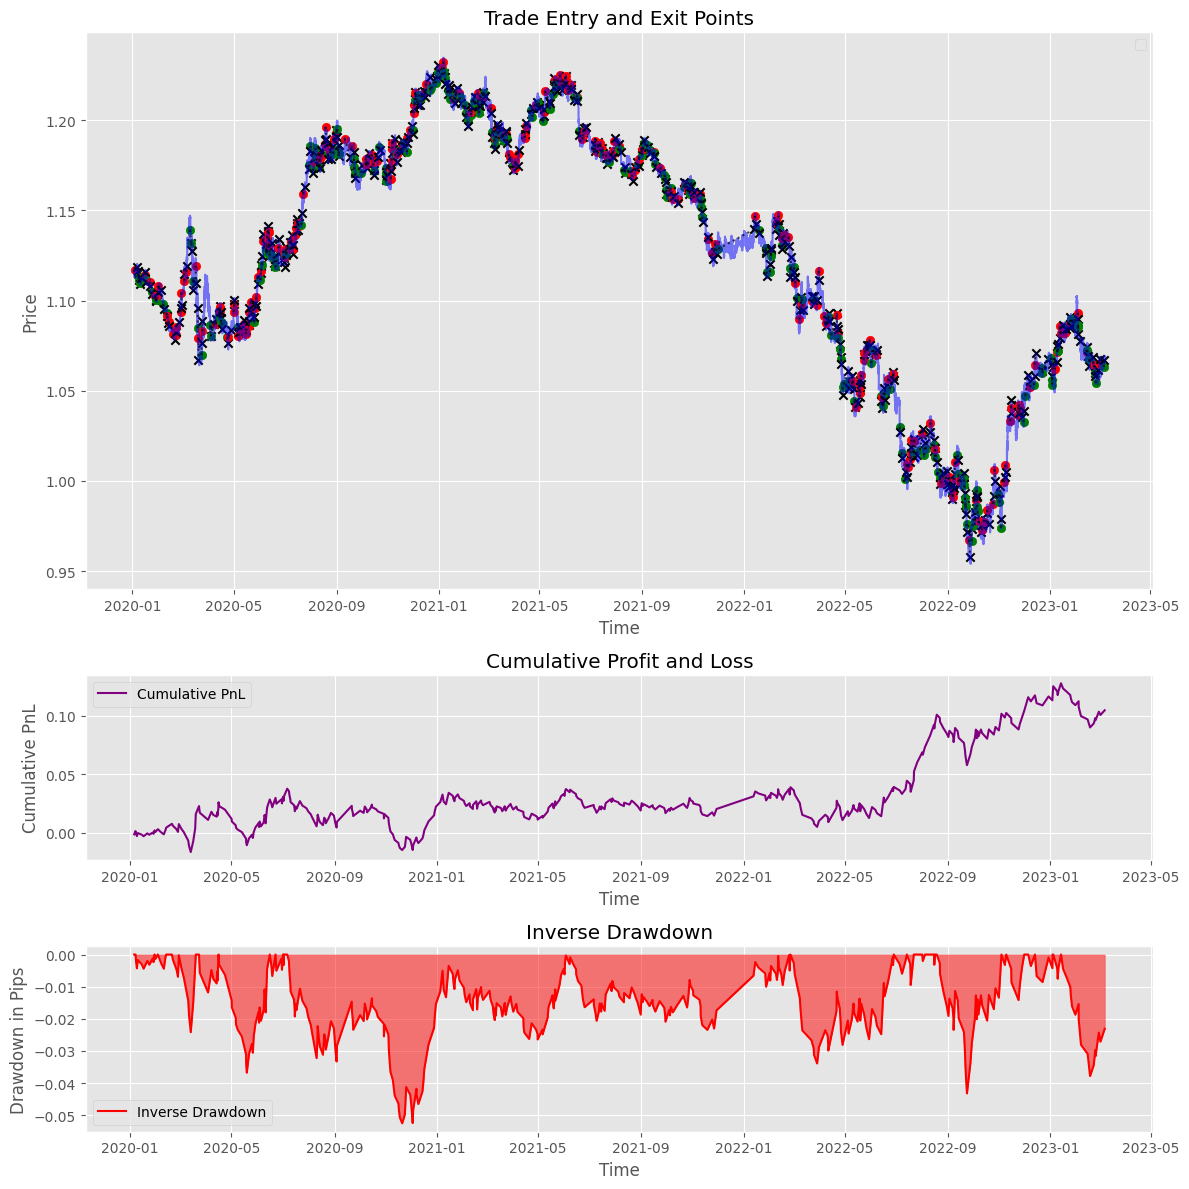

In [12]:
plot_trades(history_book=history_book,df=train)

### If the train model is good, then is time to start test that on test datframe. There is no allowed to making adjustements. Training model is for developement and test ONLY for testing!!!



# Backtesting test dataframe

In [13]:
test

,open,high,low,close,volume,low_time,high_time,RSI,ATR,lag_100_diff,lag_50_diff,lag_10_diff,lag_5_diff,hour,return,signal
time,,,,,,,,,,,,,,,,
2023-03-07 12:30:00,1.06604,1.06651,1.06565,1.06648,837,2023-03-07 12:33:00,2023-03-07 12:39:00,39.358601,0.000810,0.00270,-0.00130,-0.00073,0.00023,12,0.000394,1
2023-03-07 12:45:00,1.06646,1.06664,1.06607,1.06607,734,2023-03-07 12:47:00,2023-03-07 12:54:00,28.242075,0.000734,0.00315,-0.00199,-0.00151,0.00023,12,-0.000384,-1
2023-03-07 13:00:00,1.06606,1.06676,1.06585,1.06659,785,2023-03-07 13:01:00,2023-03-07 13:13:00,41.551247,0.000786,0.00357,-0.00159,-0.00061,0.00092,13,0.000488,1
2023-03-07 13:15:00,1.06660,1.06688,1.06624,1.06682,788,2023-03-07 13:19:00,2023-03-07 13:29:00,42.506812,0.000748,0.00316,-0.00136,-0.00055,0.00087,13,0.000216,1
2023-03-07 13:30:00,1.06680,1.06686,1.06581,1.06588,876,2023-03-07 13:44:00,2023-03-07 13:35:00,44.444444,0.000806,0.00299,-0.00245,-0.00039,-0.00018,13,-0.000881,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20 11:45:00,1.09629,1.09655,1.09628,1.09644,684,2023-12-20 11:45:00,2023-12-20 11:49:00,57.742782,0.000562,0.00236,-0.00134,0.00059,0.00057,11,0.000146,1
2023-12-20 12:00:00,1.09642,1.09652,1.09591,1.09600,745,2023-12-20 12:09:00,2023-12-20 12:01:00,44.141689,0.000580,0.00158,-0.00200,-0.00043,-0.00009,12,-0.000401,-1
2023-12-20 12:15:00,1.09599,1.09624,1.09495,1.09518,818,2023-12-20 12:25:00,2023-12-20 12:17:00,32.311321,0.000706,0.00072,-0.00283,-0.00150,-0.00062,12,-0.000748,-1


In [14]:

X_test = test[['lag_100_diff', 'lag_50_diff', 'lag_10_diff','lag_5_diff']]

test['prediction'] = model.predict(X_test)

In [15]:
accuracy_score(test['signal'], test['prediction'])

0.6339366973404793

In [16]:
position = None
cumulative_profit = 0
trades = []
cost = 0.0001
"""
Ways to imporve the strategy:
1. Time adjustement
2. Multiple entries and calculating average entry price
3. adjustable stop loss and take profit during the trade
"""


for i in range(1, len(test)):
    prev_row = test.iloc[i - 1]
    current_row = test.iloc[i]
    trading_time = current_row['hour'] > 9 and current_row['hour'] < 20
    
    # Slightly relaxed Long Entry Condition
    long_entry =  current_row['prediction'] == 1 and current_row['RSI'] < 30  and trading_time
    short_entry = current_row['prediction'] == -1 and current_row['RSI'] > 70 and trading_time

    #long_exit = current_row['Close'] > current_row['MA']
    #short_exit =  current_row['Close'] < current_row['MA']


    # Check for long entry condition
    if position is None and long_entry:
        entry_price = current_row['close']+cost
        entry_time = test.index[i]  
        tp_price = entry_price + current_row['ATR'] * 5
        sl_price = entry_price - current_row['ATR'] * 3
        position = 'long'
    
    #elif position == 'long' and not (current_row['low'] < sl_price or current_row['high'] > tp_price) and current_row['close'] > entry_price:
    #    sl_price = current_row['close'] - current_row['ATR'] * 3 


    # Check for long exit condition
    elif position == 'long' and (current_row['low'] < sl_price or current_row['high'] > tp_price):
        if current_row['low'] < sl_price and current_row['high'] > tp_price:
            if current_row['low_time'] < current_row['high_time']:
                exit_price = sl_price
            elif current_row['high_time'] < current_row['low_time']:
                exit_price = tp_price
        elif current_row['high'] > tp_price:
            exit_price = tp_price
        elif current_row['low'] < sl_price:
            exit_price = sl_price
        # else if I have exit condition
        #else:
            #exit_price = current_row['close']

        exit_time = test.index[i]  # Capturing the exit time
        pnl = exit_price - entry_price
        cumulative_profit += pnl
        trades.append({'Type': 'Long', 'Entry Price': entry_price, 'Exit Price': exit_price, 'Entry Time': entry_time, 'Exit Time': exit_time, 'PnL': pnl, 'Cumulative Profit': cumulative_profit})
        position = None

    # Check for short entry condition
    elif position is None and short_entry:
        entry_price = current_row['close'] - cost
        entry_time = test.index[i] 
        tp_price = entry_price - current_row['ATR'] * 5
        sl_price = entry_price + current_row['ATR'] * 3
        position = 'short'

    #elif position == 'short' and not (current_row['high'] > sl_price or current_row['low'] < tp_price) and current_row['close'] < entry_price :
    #    sl_price = current_row['close'] + current_row['ATR'] * 3



    # Check for short exit condition
    elif position == 'short' and (current_row['high'] > sl_price or current_row['low'] < tp_price):
        if current_row['high'] > sl_price and current_row['low'] < tp_price:
            if current_row['high_time'] < current_row['low_time']:
                exit_price = sl_price
            elif current_row['low_time'] < current_row['high_time']:
                exit_price = tp_price
        elif current_row['high'] > sl_price:
            exit_price = sl_price
        elif current_row['low'] < tp_price:
            exit_price = tp_price
        # else if I have exit condition
        #else:
           #exit_price = current_row['close']
 
        exit_time = test.index[i]  # Capturing the exit time
        pnl = entry_price - exit_price
        cumulative_profit += pnl
        trades.append({'Type': 'Short', 'Entry Price': entry_price, 'Exit Price': exit_price, 'Entry Time': entry_time, 'Exit Time': exit_time, 'PnL': pnl, 'Cumulative Profit': cumulative_profit})
        position = None
        
# Convert the list of dictionaries to a DataFrame
history_book = pd.DataFrame(trades)


In [17]:
calculate_performance_metrics(history_book)

{'Start Time': '2023-03-07 12:45:00',
 'End Time': '2023-12-19 16:45:00',
 'Win Rate (%)': 0.3,
 'Maximum Drawdown (pips)': 0.0616,
 'Average Drawdown (pips)': 0.0227,
 'Maximum Drawdown Duration': '229 days 21:30:00',
 'Average Drawdown Duration': '52 days 00:15:00',
 'Total Number of Trades': 107,
 'Buy Count': 61,
 'Sell Count': 46,
 'Total Profit (pips)': -465.08,
 'Average Time in Trade': '0 days 21:45:42',
 'Average win': 0.0045,
 'Average loss': -0.0026}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


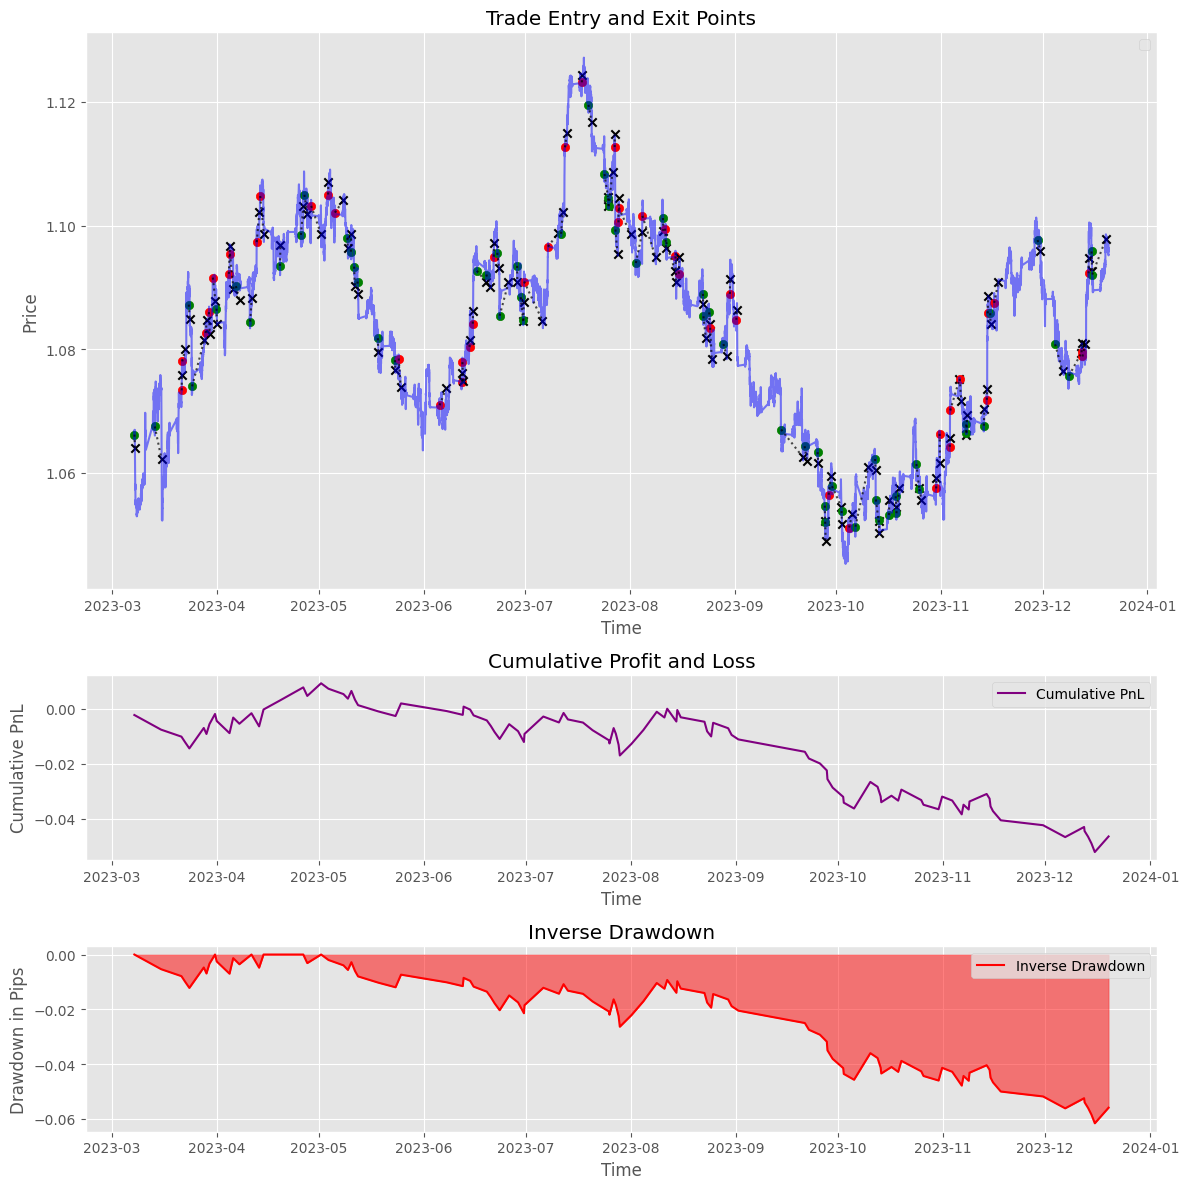

In [18]:
plot_trades(history_book, test)